**DATE**: 20 July 2017 <br>
**ENVIRONMENT**: calour <br>
**AUTHOR**: Max Abramson

The goal of this notebook is to generate heatmaps that represent the taxonomy and relative abundance of species found in the samples of a dataset. It also looks at differential abundance via a heatmap.

In [11]:
import calour as ca
import pandas as pd
%matplotlib notebook

In [12]:
alt=ca.read("filtered_otu_table_94.biom", 
            "AGP_metadata_subset_94.txt", normalize = 1000)

<IPython.core.display.Javascript object>


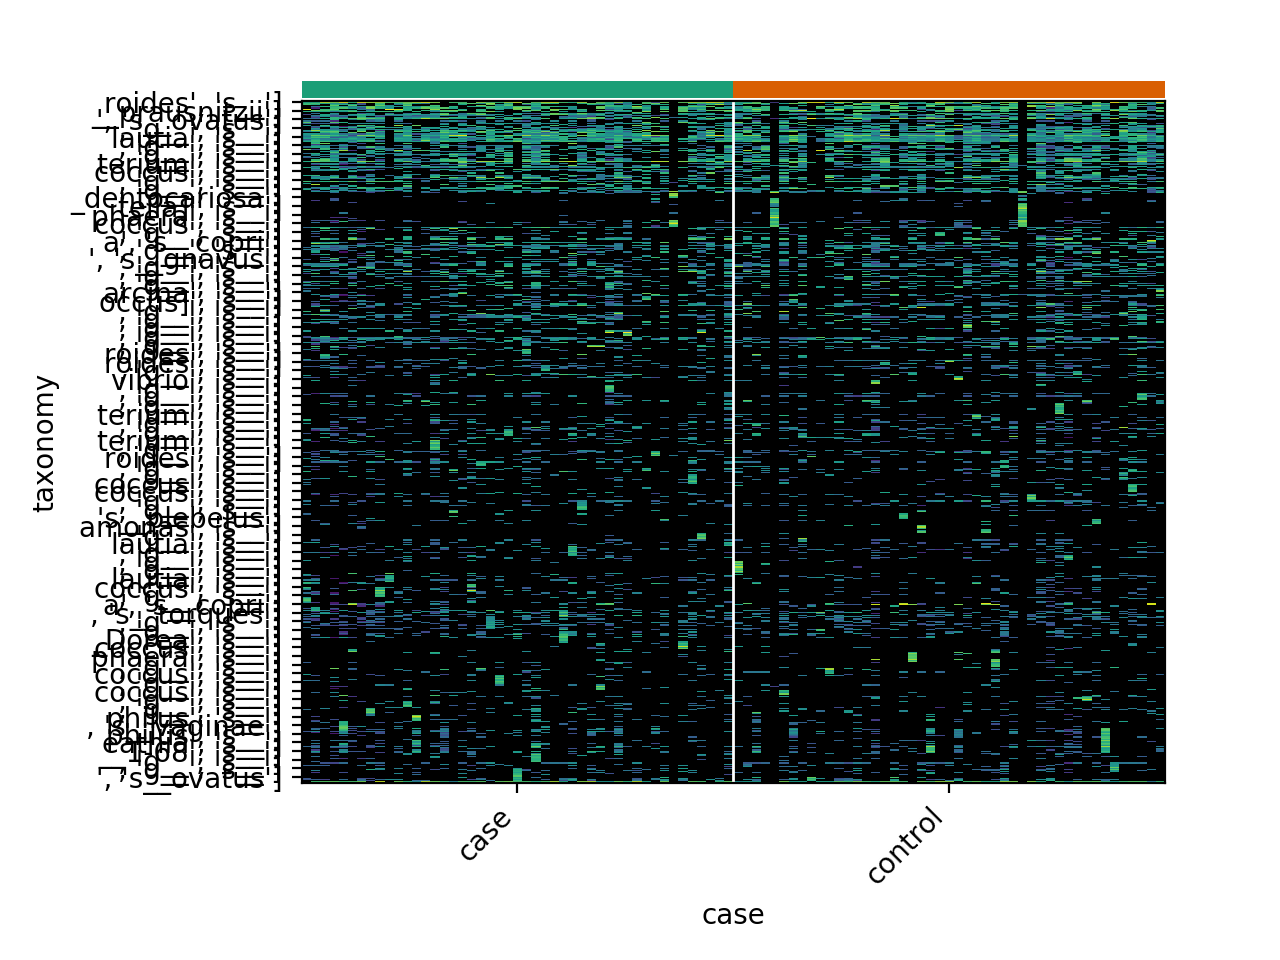

In [13]:
altexp=alt.cluster_features(10)
ca.filtering.filter_samples(altexp, "case", 
                            "not applicable", negate=True, inplace=True)
ca.sorting.sort_samples(altexp, 'collection_timestamp', inplace=True)
altexp.plot_sort('case', sample_color_bars = ['case'], 
                 feature_field = 'taxonomy', gui= 'jupyter', 
                 color_bar_label = False, inplace=True)

# Differential abundance

In [14]:
diff=ca.analysis.diff_abundance(altexp, "case", "control", "case", alpha=0.7, numperm=10000)

In [15]:
diff

Experiment filtered_otu_table_94.biom with 94 samples, 5 features

<IPython.core.display.Javascript object>


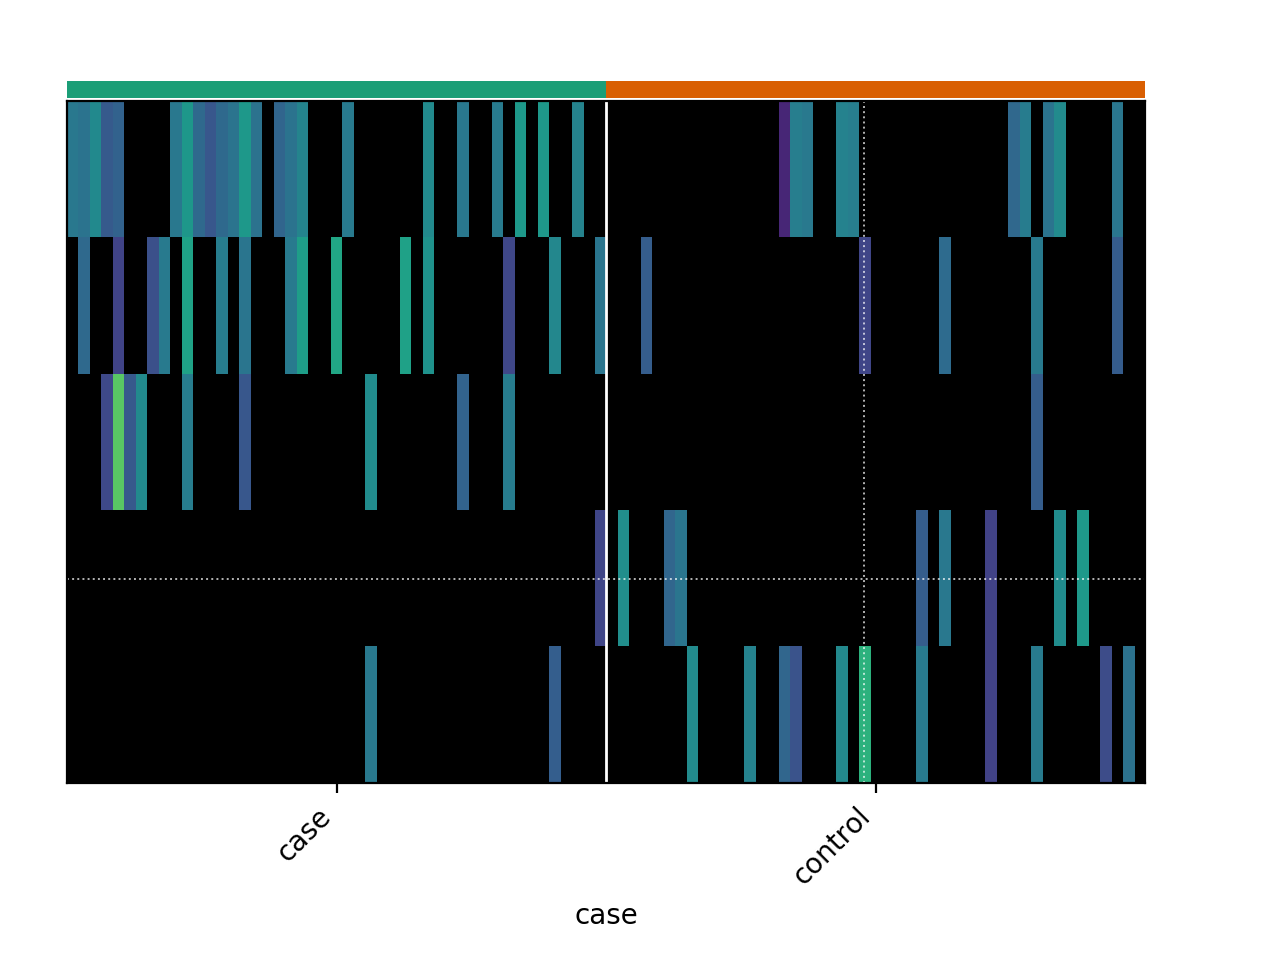

In [16]:
diff.plot_sort('case', sample_color_bars=['case'], 
               feature_fields='taxonomy', gui='jupyter', color_bar_label=False)